In [121]:
import pandas as pd
from simple_linear_regr_utils import generate_data, evaluate
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [122]:
def generate_data():
    """
    Generates a random dataset from a normal distribution.

    Returns:
        diabetes_X_train: the training dataset
        diabetes_y_train: The output corresponding to the training set
        diabetes_X_test: the test dataset
        diabetes_y_test: The output corresponding to the test set

    """
    # Load the diabetes dataset
    diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

    # Use only one feature
    diabetes_X = diabetes_X[:, np.newaxis, 2]

    # Split the data into training/testing sets
    diabetes_X_train = diabetes_X[:-20]
    diabetes_X_test = diabetes_X[-20:]

    # Split the targets into training/testing sets
    diabetes_y_train = diabetes_y[:-20].reshape(-1,1)
    diabetes_y_test = diabetes_y[-20:].reshape(-1,1)

    print(f"# Training Samples: {len(diabetes_X_train)}; # Test samples: {len(diabetes_X_test)};")
    return diabetes_X_train, diabetes_y_train, diabetes_X_test, diabetes_y_test


def evaluate(model, X, y, y_predicted):
    """ Calculates and prints evaluation metrics. """
    # The coefficients
    print(f"Slope: {model.W}; Intercept: {model.b}")
    # The mean squared error
    mse = mean_squared_error(y, y_predicted)
    print(f"Mean squared error: {mse:.2f}")
    # The coefficient of determination: 1 is perfect prediction
    r2 = r2_score(y, y_predicted)
    print(f"Coefficient of determination: {r2:.2f}")

    # Plot outputs
    plt.scatter(X, y, color="black")
    plt.plot(X, y_predicted, color="blue", linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

    if r2 >= 0.4:
        print("****** Success ******")
    else:
        print("****** Failed ******")

In [125]:
class SimpleLinearRegression:
    def __init__(self, iterations=15000, lr=0.1):
        self.iterations = iterations # number of iterations the fit method will be called
        self.lr = lr # The learning rate
        self.losses = [] # A list to hold the history of the calculated losses
        self.W, self.b = None, None # the slope and the intercept of the model

    def __loss(self, y, y_hat):
        """

        :param y: the actual output on the training set
        :param y_hat: the predicted output on the training set
        :return:
            loss: the sum of squared error

        """
        #ToDO calculate the loss. use the sum of squared error formula for simplicity
        loss = np.sum((y - y_hat)**2)

        self.losses.append(loss)
        return loss

    def __init_weights(self, X):
        """

        :param X: The training set
        """
        weights = np.random.normal(size=X.shape[1] + 1)
        self.W = weights[:X.shape[1]]#.reshape(-1, X.shape[1])
        self.b = weights[-1]

    def __sgd(self, X, y, y_hat):
        """

        :param X: The training set
        :param y: The actual output on the training set
        :param y_hat: The predicted output on the training set
        :return:
            sets updated W and b to the instance Object (self)
        """
        # ToDo calculate dW & db.
        dW = (2/len(y)) * np.sum(X*(y_hat-y))
        db = (2/len(y)) * np.sum((y_hat-y))
        #print('n = ',len(y))
        #print('dW ',dW)
        #print('db ',db)
        #  ToDO update the self.W and self.b using the learning rate and the values for dW and db
        self.W = self.W - (self.lr * dW)
        self.b = self.b - (self.lr * db)
        #print(pd.DataFrame({'W':self.W, 'b':self.b}))
        


    def fit(self, X, y):
        """

        :param X: The training set
        :param y: The true output of the training set
        :return:
        """
        self.__init_weights(X)
        y_hat = self.predict(X)
        #print('ndim =',y_hat)
        #print(pd.DataFrame({'Actual':y.flatten(), 'predicted':y_hat.flatten()}))
        loss = self.__loss(y, y_hat)
        #print(f"Initial Loss: {loss}")
        for i in range(self.iterations + 1):
            self.__sgd(X, y, y_hat)
            y_hat = self.predict(X)
            loss = self.__loss(y, y_hat)
            #print('iteration = ',i)
            #print(pd.DataFrame({'Actual':y.flatten(), 'predicted':y_hat.flatten()}))
            if not i % 100:
                print(f"Iteration {i}, Loss: {loss}")

    def predict(self, X):
        """

        :param X: The training dataset
        :return:
            y_hat: the predicted output
        """
        #ToDO calculate the predicted output y_hat. remember the function of a line is defined as y = WX + b
        y_hat = (self.W * X) + self.b
        return y_hat

In [128]:
import pickle

# Training Samples: 422; # Test samples: 20;
Iteration 0, Loss: 8929229.69069947
Iteration 100, Loss: 2435124.810848781
Iteration 200, Loss: 2368762.3159354315
Iteration 300, Loss: 2308148.3443904687
Iteration 400, Loss: 2252784.9414435057
Iteration 500, Loss: 2202217.286697535
Iteration 600, Loss: 2156029.9576968704
Iteration 700, Loss: 2113843.517156327
Iteration 800, Loss: 2075311.3958151003
Iteration 900, Loss: 2040117.0453074258
Iteration 1000, Loss: 2007971.337660342
Iteration 1100, Loss: 1978610.190054948
Iteration 1200, Loss: 1951792.3953381495
Iteration 1300, Loss: 1927297.6404621438
Iteration 1400, Loss: 1904924.6965727722
Iteration 1500, Loss: 1884489.7658779868
Iteration 1600, Loss: 1865824.9717156459
Iteration 1700, Loss: 1848776.9794162922
Iteration 1800, Loss: 1833205.7366310256
Iteration 1900, Loss: 1818983.3227760582
Iteration 2000, Loss: 1805992.8981419127
Iteration 2100, Loss: 1794127.744034021
Iteration 2200, Loss: 1783290.3860592884
Iteration 2300, Loss: 1773391.79

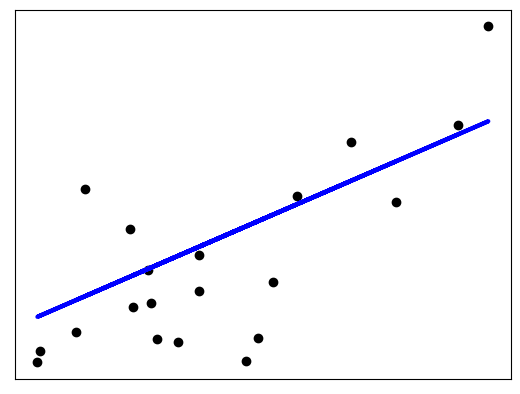

****** Success ******


In [130]:
if __name__ == "__main__":
    X_train, y_train, X_test, y_test = generate_data()
    model = SimpleLinearRegression()
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    evaluate(model, X_test, y_test, predicted)
    pkl_filename = "iris_model.pkl"
    with open(pkl_filename, 'wb') as file:
        pickle.dump(model, file)